**先调sklearn（输出0/1）**

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('trainingSet_user.csv')
data

,Unnamed: 0,用户的id,用户的姓名,"用户的签名（0,1）",用户的等级,有没有佩戴粉丝牌,vip,关注数,粉丝数,用户收藏的视频总数,保密,女,男
0,0,1,bishi,0,0.069499,0.0,1,-0.469268,5.602482,-0.064784,1,0,0
1,1,2,碧诗,1,1.146091,1.0,1,0.656469,34.215994,-0.064784,0,0,1
2,2,3,囧囧倉,1,0.607795,0.0,0,0.192930,0.327618,0.846373,0,0,1
3,3,4,枢木朱雀,0,0.607795,1.0,1,-0.133439,0.120264,-0.064784,1,0,0
4,4,5,幻想乡,0,1.146091,0.0,1,-0.412508,0.194830,-0.016342,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72430,72430,99988,くらめさや,0,-1.545389,0.0,0,-0.492918,-0.029079,-0.064784,1,0,0
72431,72431,99989,御坂夜夜,0,1.146091,1.0,1,1.337587,-0.028027,-0.064784,1,0,0
72432,72432,99990,真红の血星石,0,0.607795,1.0,1,-0.024650,-0.029535,-0.064784,1,0,0
72433,72433,99991,挨丝菊花,0,0.069499,0.0,0,-0.492918,-0.029675,-0.064784,1,0,0


In [3]:
trainingSet = data.iloc[:, 3:]
trainingSet

,"用户的签名（0,1）",用户的等级,有没有佩戴粉丝牌,vip,关注数,粉丝数,用户收藏的视频总数,保密,女,男
0,0,0.069499,0.0,1,-0.469268,5.602482,-0.064784,1,0,0
1,1,1.146091,1.0,1,0.656469,34.215994,-0.064784,0,0,1
2,1,0.607795,0.0,0,0.192930,0.327618,0.846373,0,0,1
3,0,0.607795,1.0,1,-0.133439,0.120264,-0.064784,1,0,0
4,0,1.146091,0.0,1,-0.412508,0.194830,-0.016342,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72430,0,-1.545389,0.0,0,-0.492918,-0.029079,-0.064784,1,0,0
72431,0,1.146091,1.0,1,1.337587,-0.028027,-0.064784,1,0,0
72432,0,0.607795,1.0,1,-0.024650,-0.029535,-0.064784,1,0,0
72433,0,0.069499,0.0,0,-0.492918,-0.029675,-0.064784,1,0,0


In [4]:
trainingData = trainingSet.drop(columns='vip')
trainingData

,"用户的签名（0,1）",用户的等级,有没有佩戴粉丝牌,关注数,粉丝数,用户收藏的视频总数,保密,女,男
0,0,0.069499,0.0,-0.469268,5.602482,-0.064784,1,0,0
1,1,1.146091,1.0,0.656469,34.215994,-0.064784,0,0,1
2,1,0.607795,0.0,0.192930,0.327618,0.846373,0,0,1
3,0,0.607795,1.0,-0.133439,0.120264,-0.064784,1,0,0
4,0,1.146091,0.0,-0.412508,0.194830,-0.016342,0,0,1
...,...,...,...,...,...,...,...,...,...
72430,0,-1.545389,0.0,-0.492918,-0.029079,-0.064784,1,0,0
72431,0,1.146091,1.0,1.337587,-0.028027,-0.064784,1,0,0
72432,0,0.607795,1.0,-0.024650,-0.029535,-0.064784,1,0,0
72433,0,0.069499,0.0,-0.492918,-0.029675,-0.064784,1,0,0


In [5]:
# 统计各性别数量
secret = trainingData.iloc[:, -3].sum()
F = trainingData.iloc[:, -2].sum()
M = trainingData.iloc[:, -1].sum()
print("性别保密的样本数为：", secret)
print("性别女的样本数为：", F)
print("性别男的样本数为：", M)

性别保密的样本数为： 66425
性别女的样本数为： 1128
性别男的样本数为： 4882


In [6]:
X = np.array(trainingData)
X

array([[0.        , 0.06949877, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.14609065, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.60779471, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.60779471, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.06949877, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.60779471, 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [7]:
y = trainingSet.iloc[:, 3]
y = np.array(y)
y

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

**数据准备完毕，开始sklearn**

**先用决策树**

In [8]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pydot
from sklearn.tree import export_graphviz

In [9]:
DTC = tree.DecisionTreeClassifier()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print('训练数据集X_train.shape：', X_train.shape)
print('训练数据集y_train.shape：', y_train.shape)
print('测试数据集X_test.shape：', X_test.shape)
print('测试数据集y_test.shape：', y_test.shape)

训练数据集X_train.shape： (57948, 9)
训练数据集y_train.shape： (57948,)
测试数据集X_test.shape： (14487, 9)
测试数据集y_test.shape： (14487,)


In [12]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {'criterion': ['gini', 'entropy']
                  , 'max_depth': range(3,20)
                  , 'splitter': ['best','random']
                  , 'min_samples_split': [0.05,0.025,0.0125]
                  , 'min_samples_leaf': [0.025,0.0125,0.005]
                 }
random_search = RandomizedSearchCV(DTC, param_distribs, n_iter = 50, cv = 3)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
best_DTC = random_search.best_estimator_

{'splitter': 'best', 'min_samples_split': 0.0125, 'min_samples_leaf': 0.025, 'max_depth': 16, 'criterion': 'gini'}


In [13]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

y_pred_DTC = best_DTC.predict(X_test)
print('DTC分类报告为: \n', classification_report(y_test, y_pred_DTC))

DTC分类报告为: 
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      9587
           1       0.67      0.73      0.70      4900

    accuracy                           0.79     14487
   macro avg       0.76      0.77      0.76     14487
weighted avg       0.79      0.79      0.79     14487



In [14]:
# AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_DTC, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('AUC:', AUC)

AUC: 0.7707441837692625


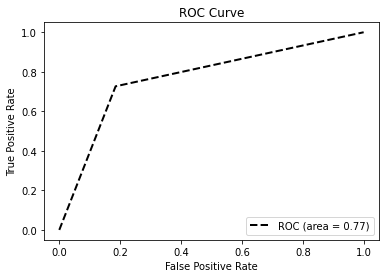

In [15]:
# ROC曲线
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(AUC), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

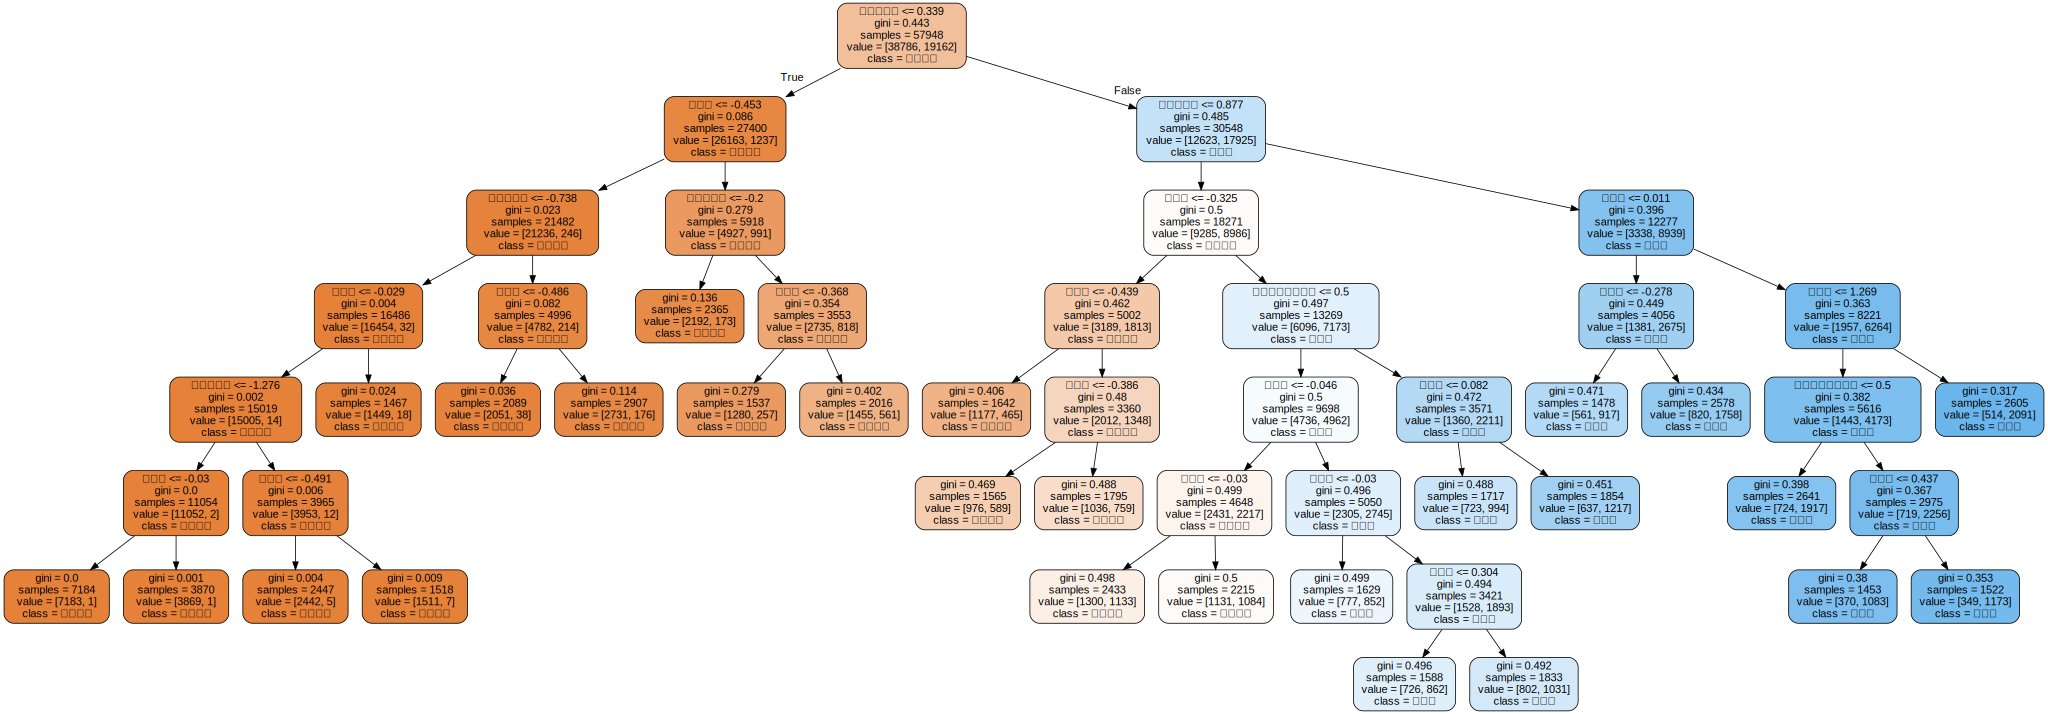

In [16]:
# 画图
import graphviz

feature_name = trainingData.columns
class_name=["非大会员", "大会员"]
dot_data=tree.export_graphviz(best_DTC, feature_names=feature_name, class_names=class_name, filled=True, rounded=True)
graph=graphviz.Source(dot_data)
graph

In [17]:
# 每个特征对应的feature_importance
feature_name = feature_name
[*zip(feature_name, best_DTC.feature_importances_)]

[('用户的签名（0,1）', 0.0),
 ('用户的等级', 0.9310890235403789),
 ('有没有佩戴粉丝牌', 0.006282111292836781),
 ('关注数', 0.06226377873112902),
 ('粉丝数', 0.0003650864356553545),
 ('用户收藏的视频总数', 0.0),
 ('保密', 0.0),
 ('女', 0.0),
 ('男', 0.0)]

**可看出性别重要性为0，所以性别不均衡应该不会影响结果**

**换随机森林**

In [18]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('训练数据集X_train.shape：', X_train.shape)
print('训练数据集y_train.shape：', y_train.shape)
print('测试数据集X_test.shape：', X_test.shape)
print('测试数据集y_test.shape：', y_test.shape)

训练数据集X_train.shape： (57948, 9)
训练数据集y_train.shape： (57948,)
测试数据集X_test.shape： (14487, 9)
测试数据集y_test.shape： (14487,)


In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {'n_estimators': range(50, 200)
                 , 'criterion': ['gini', 'entropy']
                 , 'max_depth': range(3,20)
                 , 'min_samples_split': [0.05,0.025,0.0125]
                 , 'min_samples_leaf': [0.025,0.0125,0.005]
                 }
random_search = RandomizedSearchCV(RFC, param_distribs, n_iter = 50, cv = 3)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
best_RFC = random_search.best_estimator_

{'n_estimators': 136, 'min_samples_split': 0.05, 'min_samples_leaf': 0.005, 'max_depth': 9, 'criterion': 'entropy'}


In [21]:
y_pred_RFC = best_RFC.predict(X_test)

print('RFC分类报告为: \n', classification_report(y_test, y_pred_RFC))

RFC分类报告为: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      9733
           1       0.65      0.77      0.70      4754

    accuracy                           0.79     14487
   macro avg       0.76      0.78      0.77     14487
weighted avg       0.80      0.79      0.79     14487



In [22]:
# AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_RFC, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('AUC:', AUC)

AUC: 0.7825845316046994


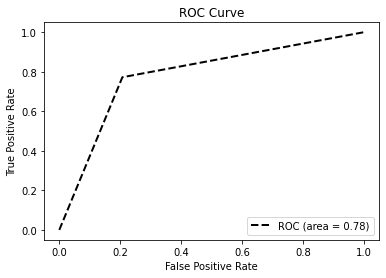

In [23]:
# ROC曲线
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(AUC), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**和单个决策树的效果相差无几，可能由于数据较简单，单个决策树也能拟合得很好**

**换AdaBoost**

In [24]:
from sklearn.ensemble import AdaBoostClassifier

ABC = AdaBoostClassifier()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('训练数据集X_train.shape：', X_train.shape)
print('训练数据集y_train.shape：', y_train.shape)
print('测试数据集X_test.shape：', X_test.shape)
print('测试数据集y_test.shape：', y_test.shape)

训练数据集X_train.shape： (57948, 9)
训练数据集y_train.shape： (57948,)
测试数据集X_test.shape： (14487, 9)
测试数据集y_test.shape： (14487,)


In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {'n_estimators': range(50, 200)
                  , 'learning_rate': np.arange(0.1, 1, 0.1)
                  , 'algorithm': ['SAMME', 'SAMME.R']
                 }
random_search = RandomizedSearchCV(ABC, param_distribs, n_iter = 50, cv = 3)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
best_ABC = random_search.best_estimator_

{'n_estimators': 185, 'learning_rate': 0.2, 'algorithm': 'SAMME.R'}


In [27]:
y_pred_ABC = best_ABC.predict(X_test)

print('ABC分类报告为: \n', classification_report(y_test, y_pred_ABC))

ABC分类报告为: 
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      9655
           1       0.66      0.75      0.70      4832

    accuracy                           0.79     14487
   macro avg       0.76      0.78      0.77     14487
weighted avg       0.79      0.79      0.79     14487



In [28]:
# AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_ABC, pos_label=1)
AUC = metrics.auc(fpr, tpr)
print('AUC:', AUC)

AUC: 0.7756744802473412


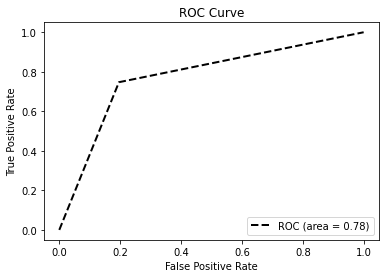

In [29]:
# ROC曲线
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(AUC), lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**AdaBoost和前两者也差不多**